# Контест 1
## Студент: Постнов Л. А.
## Группа: М8О-306Б-22

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Подгружаем датасет

In [121]:
df = pd.read_csv('./train.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Следующая функция строит графиики распределения определенного признака из определенного датасета

In [122]:
def distribution_plot(df, feature):
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.show()

Начинаем обработку данных, а именно работу с пропущенными значениями:
* Удаляем полностью пустые строки
* Заполняем пропуски в категориальных признаках модой
* Используем KNN для заполнения пропусков в числовых признаках

Между делом проверяем, что все пропуски действительно ушли

In [123]:
df = df.dropna(how='all').copy()
df.isnull().sum()

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   501
LoanAmount                    501
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           501
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             501
LoanPurpose                   501
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        501
TotalAssets                   501
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [124]:
df.select_dtypes(include=['object']).isnull().sum()

ApplicationDate          0
MaritalStatus            0
HomeOwnershipStatus      0
LoanPurpose            501
EmploymentStatus         0
EducationLevel           0
dtype: int64

In [125]:
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df.select_dtypes(include=['object'])

,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
0,2010-06-26,Divorced,Rent,Education,Employed,Associate
1,1996-09-23,Widowed,Mortgage,Home,Employed,High School
2,2015-01-19,Married,Mortgage,Education,Employed,Bachelor
3,1981-05-12,Married,Other,Debt Consolidation,Employed,High School
4,1995-05-07,Single,Rent,Debt Consolidation,Employed,Bachelor
...,...,...,...,...,...,...
11011,1980-01-15,Divorced,Own,Home,Employed,Associate
11012,2010-07-10,Married,Own,Education,Employed,Associate
11013,2003-10-22,Single,Own,Home,Employed,Bachelor
11014,1983-05-12,Married,Rent,Education,Self-Employed,Associate


In [126]:
df.select_dtypes(include=['object']).isnull().sum()

ApplicationDate        0
MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

In [127]:
from sklearn.impute import KNNImputer

columns_with_missing_data = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer(n_neighbors=5)
df[columns_with_missing_data] = imputer.fit_transform(df[columns_with_missing_data])

In [128]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

Удаляем столбец с датой за ненадобностью

In [129]:
df.drop('ApplicationDate', axis=1, inplace=True)

Исследуем целевую переменную и удаляем выбросы

In [130]:
round(df['RiskScore'].describe(), 2)

count       10487.00
mean       -25698.78
std       1431674.59
min      -9999999.00
25%            32.56
50%            44.12
75%            65.36
max      10000000.00
Name: RiskScore, dtype: float64

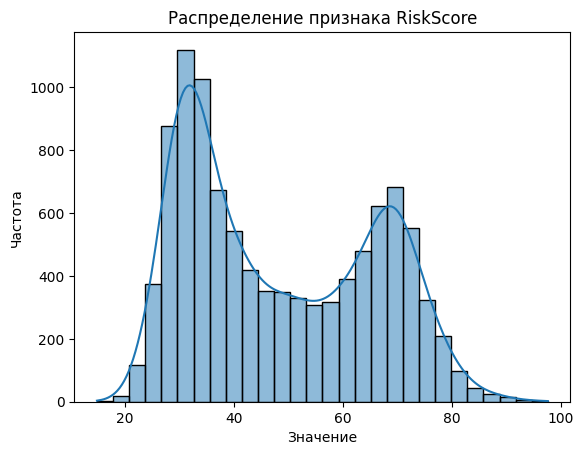

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,27.0,66829.0,549.000000,17290.000000,60.0,Divorced,1.0,Rent,1095.000000,0.151985,...,Employed,Associate,4.0,35067.00000,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,55.0,172147.0,850.000000,16110.000000,36.0,Widowed,1.0,Mortgage,211.000000,0.175693,...,Employed,High School,33.0,27001.00000,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,51.0,300000.0,850.000000,38436.000000,36.0,Married,0.0,Mortgage,546.000000,0.444605,...,Employed,Bachelor,28.0,278382.00000,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,25.0,34683.0,847.000000,19186.000000,48.0,Married,0.0,Other,153.000000,0.188452,...,Employed,High School,0.0,9224.00000,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,55.0,300000.0,850.000000,30437.000000,48.0,Single,2.0,Rent,562.000000,0.273431,...,Employed,Bachelor,31.0,4502.00000,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,39.0,300000.0,850.000000,7721.000000,72.0,Divorced,5.0,Own,276.000000,0.215136,...,Employed,Associate,16.0,18607.00000,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,57.0,300000.0,850.000000,14756.000000,48.0,Married,2.0,Own,620.000000,0.477742,...,Employed,Associate,38.0,167544.00000,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,28.0,15000.0,300.000000,51361.000000,96.0,Single,1.0,Own,696.000000,0.322554,...,Employed,Bachelor,5.0,116879.00000,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,23.0,15000.0,302.000000,30724.000000,72.0,Married,3.0,Rent,413.000000,0.497062,...,Self-Employed,Associate,0.0,250778.00000,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707


In [131]:
def remove_outliers_iqr(df, column):
    # Вычисляем Q1 (25-й процентиль) и Q3 (75-й процентиль)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Интерквартильный размах (IQR)
    IQR = Q3 - Q1
    
    # Определяем границы для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Фильтруем данные, убирая выбросы
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Применяем к нужному столбцу, например 'RiskScore'
df = remove_outliers_iqr(df, 'RiskScore')
distribution_plot(df, 'RiskScore')
df


Исследуем два не очень понятных мне признака

[0.        1.        0.0525736]


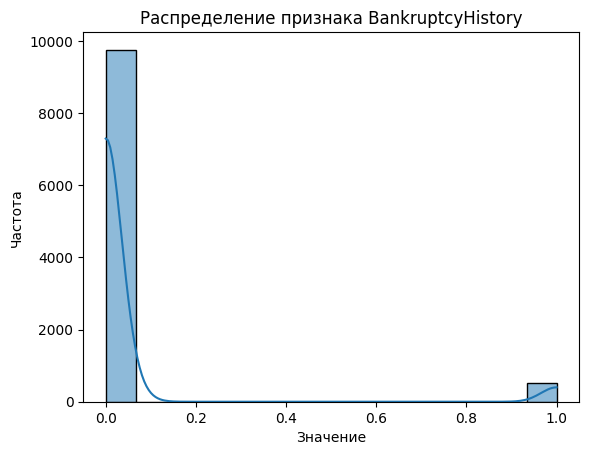

In [132]:
print(df['BankruptcyHistory'].unique())
distribution_plot(df, 'BankruptcyHistory')

Замечаем, что, вообще говоря, признак должен быть логическим (1 и 0), но помимо этого присутствует какое-то залетное значение, его мы депортируем из датасета

In [133]:
print(df[(df['BankruptcyHistory'] != 1) & (df['BankruptcyHistory'] != 0)].count())
df = df[(df['BankruptcyHistory'] == 1) | (df['BankruptcyHistory'] == 0)]

Age                           485
AnnualIncome                  485
CreditScore                   485
LoanAmount                    485
LoanDuration                  485
MaritalStatus                 485
NumberOfDependents            485
HomeOwnershipStatus           485
MonthlyDebtPayments           485
CreditCardUtilizationRate     485
NumberOfOpenCreditLines       485
NumberOfCreditInquiries       485
DebtToIncomeRatio             485
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults          485
PaymentHistory                485
LengthOfCreditHistory         485
SavingsAccountBalance         485
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities              485
MonthlyIncome                 485
UtilityBillsPaymentHistory    485
JobTenure                     485
EmploymentStatus              485
EducationLevel                485
Experience                    485
NetWorth                      485
BaseInterestRa

[0. 1.]


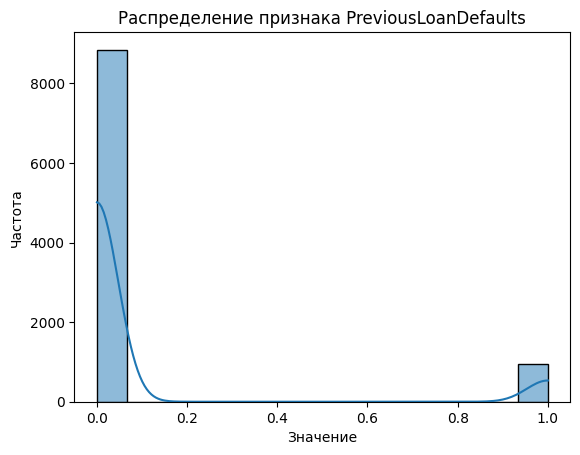

In [134]:
print(df['PreviousLoanDefaults'].unique())
distribution_plot(df, 'PreviousLoanDefaults')

Отделяем целевую переменную в отдельный датафрейм, для дальнейшего использованя в обучении моделей

In [135]:
Y = df.iloc[:,-1]
df.drop('RiskScore', axis=1, inplace=True)
Y

/tmp/ipykernel_35885/1961070448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('RiskScore', axis=1, inplace=True)


0        66.176500
1        28.495737
2        34.488104
3        36.910753
4        31.347091
           ...    
11010    41.553066
11011    28.051757
11012    32.440586
11013    67.673170
11014    75.292707
Name: RiskScore, Length: 9787, dtype: float64

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


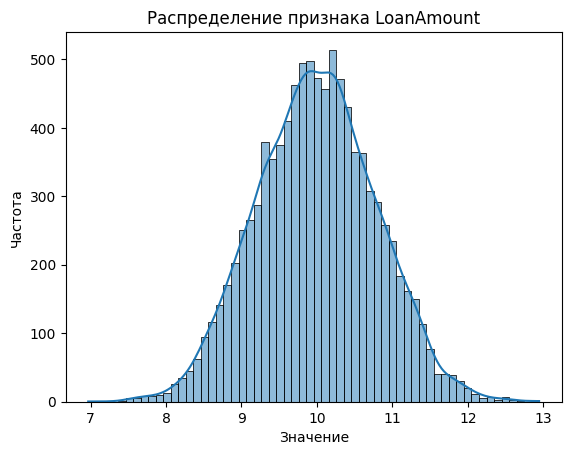

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


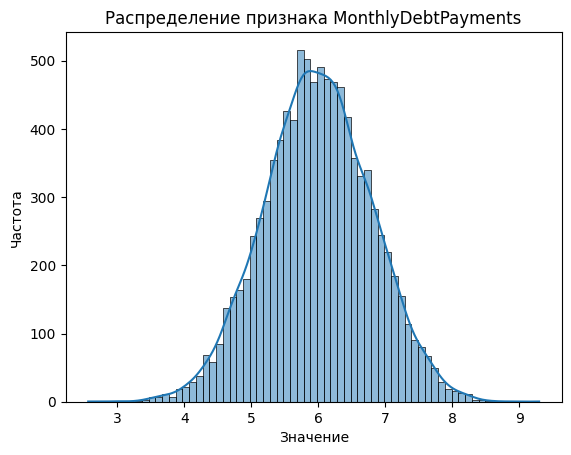

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


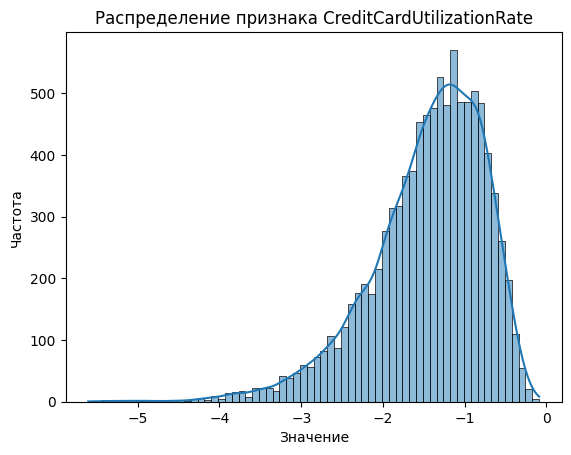

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


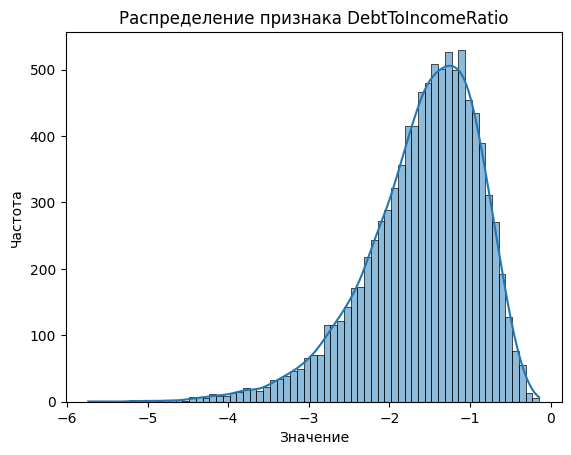

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


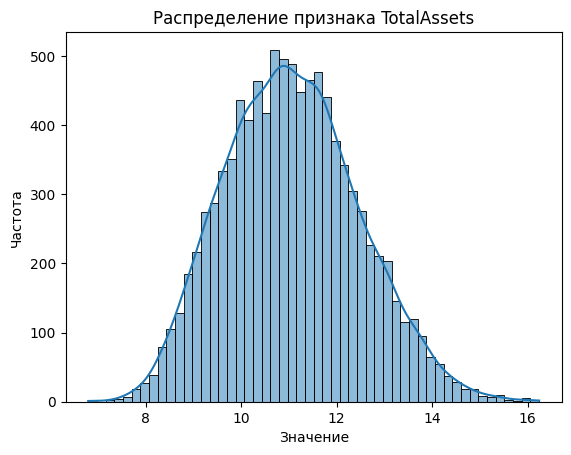

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


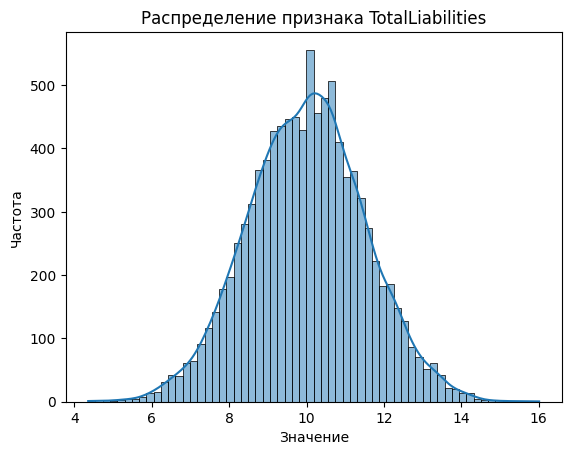

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


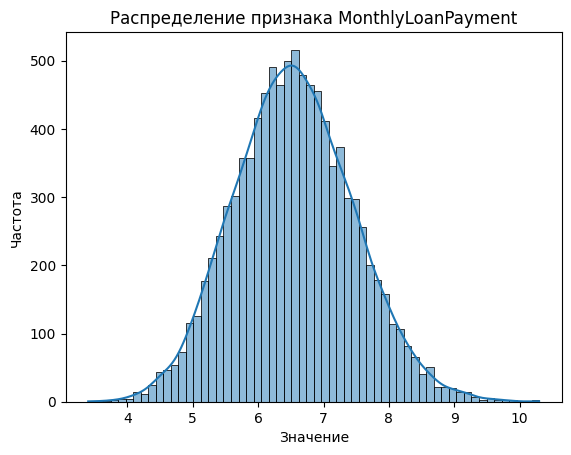

/tmp/ipykernel_35885/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


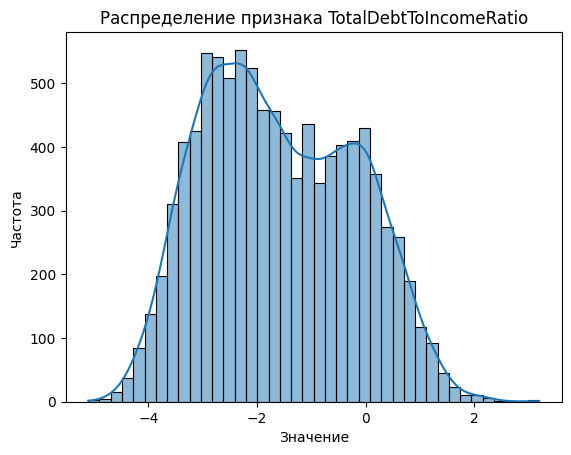

In [136]:
features_to_log = ['LoanAmount', 'MonthlyDebtPayments',
                   'CreditCardUtilizationRate', 'DebtToIncomeRatio', 
                   'TotalAssets','TotalLiabilities', 'MonthlyLoanPayment',
                   'TotalDebtToIncomeRatio']

for feature in features_to_log:
    df[feature] = np.log(df[feature].replace(0, 1e-9))
    distribution_plot(df, feature)

Используем Z-преобразование, чтобы нормализовать признаки, не забывая исключить логические признаки (1 и 0)

In [137]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.select_dtypes(include=['float64']).columns.tolist()
columns_to_normalize.remove('LoanApproved')
columns_to_normalize.remove('BankruptcyHistory')
columns_to_normalize.remove('PreviousLoanDefaults')
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

/tmp/ipykernel_35885/1126394449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,-1.111396,-0.557445,-0.735103,-0.300908,0.267948,Divorced,-0.401500,Rent,1.266570,-0.612661,...,-0.426292,Employed,Associate,-1.206022,-0.256963,0.605869,0.531148,-0.348349,0.246009,0.0
1,1.301172,0.349975,0.981315,-0.390616,-0.712207,Widowed,-0.401500,Mortgage,-0.798365,-0.406170,...,-1.334557,Employed,High School,1.352230,-0.274446,-1.209790,-1.107447,-0.336112,-1.003534,1.0
2,0.956519,1.451557,0.981315,0.712910,-0.712207,Married,-1.107480,Mortgage,0.393909,0.916451,...,-0.880425,Employed,Bachelor,0.911152,0.270408,-0.973674,-0.876908,0.653897,-0.744261,1.0
3,-1.283722,-0.834415,0.964208,-0.168858,-0.222130,Married,-1.107480,Other,-1.201433,-0.306301,...,-0.880425,Employed,High School,-1.558884,-0.312976,-1.055636,-0.904049,-0.371155,0.069955,1.0
4,1.301172,1.451557,0.981315,0.416790,-0.222130,Single,0.304480,Rent,0.430128,0.223927,...,0.027841,Employed,Bachelor,1.175799,-0.323211,-0.952511,-1.150258,0.086017,-0.973821,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,0.611867,-0.369125,-0.170567,-1.760954,-1.692361,Divorced,0.304480,Rent,-1.760062,-1.039313,...,-0.426292,Employed,Bachelor,0.470075,-0.069196,-0.465653,-0.364660,-0.372806,-0.668779,1.0
11011,-0.077439,1.451557,0.981315,-1.324013,0.758025,Divorced,2.422419,Own,-0.461607,-0.117647,...,-1.334557,Employed,Associate,-0.147435,-0.292639,-0.981235,-0.947792,-1.716106,-1.791307,1.0
11012,1.473498,1.451557,0.981315,-0.502028,-0.222130,Married,0.304480,Own,0.553295,1.018853,...,-0.426292,Employed,Associate,1.793308,0.030173,-1.118351,-0.970660,-0.672617,-1.173069,1.0
11013,-1.025233,-1.004003,-2.154997,1.080794,1.738179,Single,-0.401500,Own,0.698298,0.459290,...,-0.880425,Employed,Bachelor,-1.117806,-0.079641,2.600165,2.079992,1.033989,1.635036,0.0


Используем One-Hot-Ecoding

In [138]:
categorial = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorial, drop_first=True)

bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9787 entries, 0 to 11014
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9787 non-null   float64
 1   AnnualIncome                    9787 non-null   float64
 2   CreditScore                     9787 non-null   float64
 3   LoanAmount                      9787 non-null   float64
 4   LoanDuration                    9787 non-null   float64
 5   NumberOfDependents              9787 non-null   float64
 6   MonthlyDebtPayments             9787 non-null   float64
 7   CreditCardUtilizationRate       9787 non-null   float64
 8   NumberOfOpenCreditLines         9787 non-null   float64
 9   NumberOfCreditInquiries         9787 non-null   float64
 10  DebtToIncomeRatio               9787 non-null   float64
 11  BankruptcyHistory               9787 non-null   float64
 12  PreviousLoanDefaults            9787 n

Первая модель!!!!!

Используем ElasicNet, который смещен в сторону LASSO, чтобы отобрать самые важные признаки

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

elastic_net_cv = ElasticNetCV(cv=5,
                              l1_ratio=[0.7, 0.9, 1.0],
                              alphas=[0.1, 1, 10],
                              random_state=52,
                              fit_intercept=True)

elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Коэффициенты признаков:", elastic_net_cv.coef_)

Mean Squared Error: 17.86550298859682
Коэффициенты признаков: [ -0.          -0.10153004  -6.28947263  -0.05798926   0.
   0.          -0.66905683   0.7344377    0.          -0.
   1.72046051   9.9841315    0.93732956   0.          -0.70314458
   0.           0.          -1.6886298    0.29728237  -0.11372836
   0.           0.          -0.          -0.29473766   0.
   0.          -1.35274599   3.34961903 -17.02920755   0.
   0.          -0.          -0.           0.           0.
  -0.           0.          -0.           0.           1.29887617
   0.24623077   0.           0.          -0.           0.        ]


In [140]:
coefs = elastic_net_cv.coef_
feature_names = df.columns
important_features = feature_names[coefs != 0]
important_features

Index(['AnnualIncome', 'CreditScore', 'LoanAmount', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved',
       'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed'],
      dtype='object')

Визуализируем распределения наиболее важных признаков

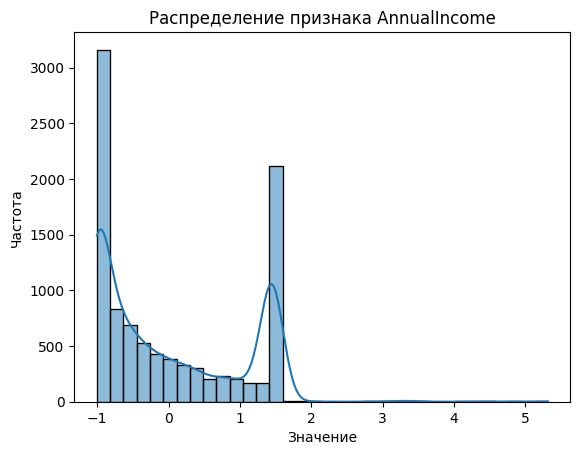

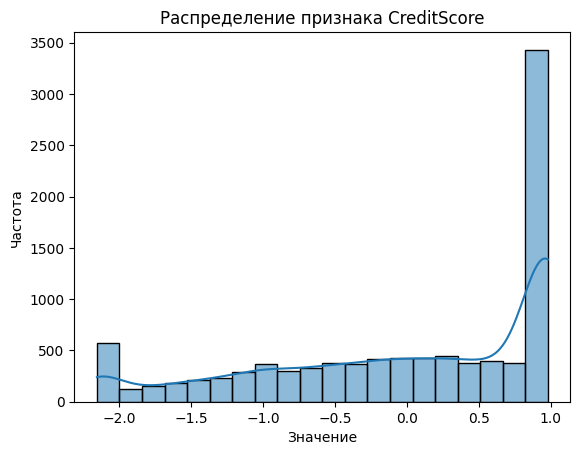

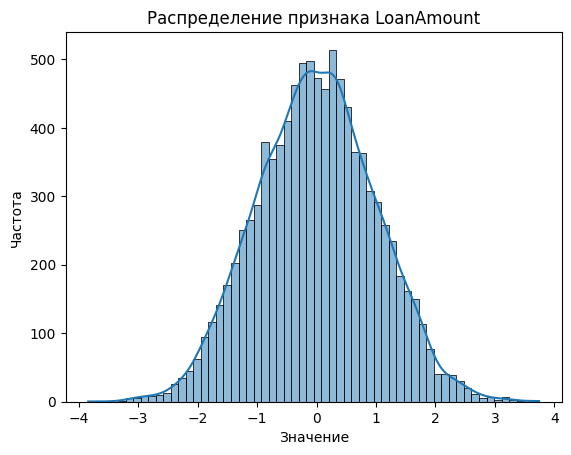

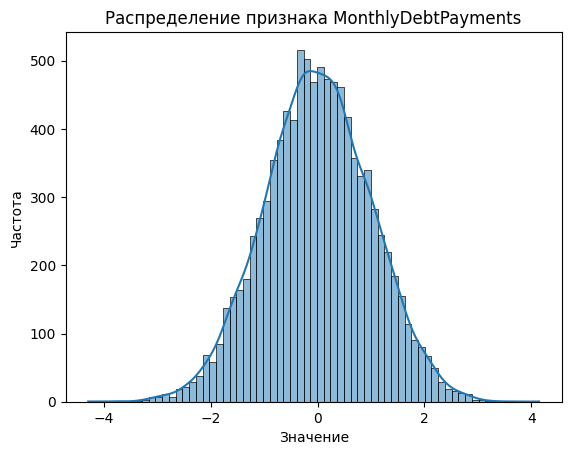

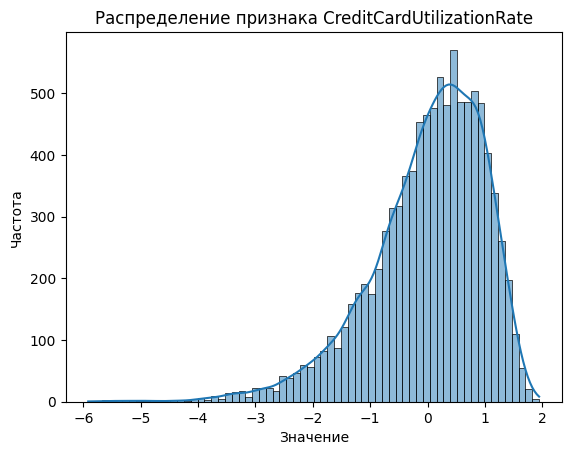

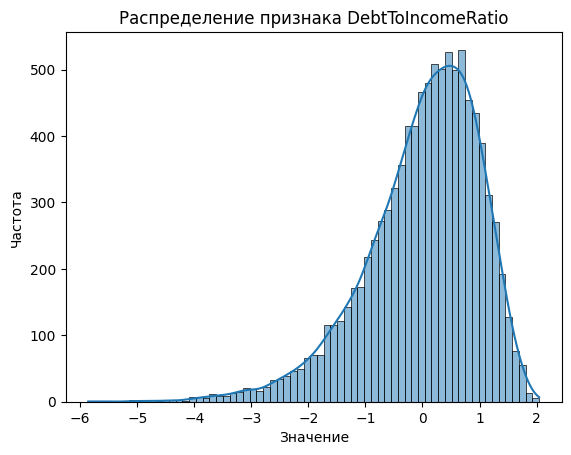

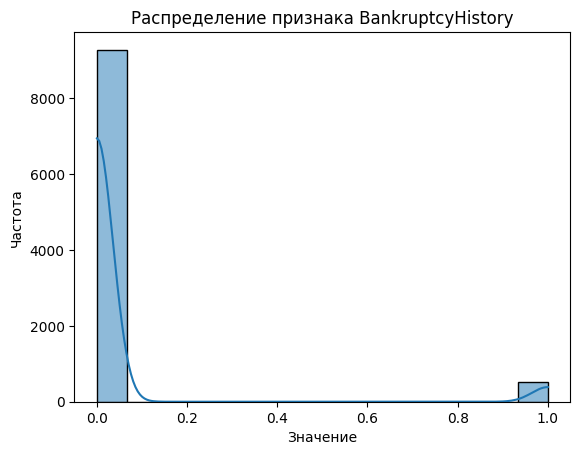

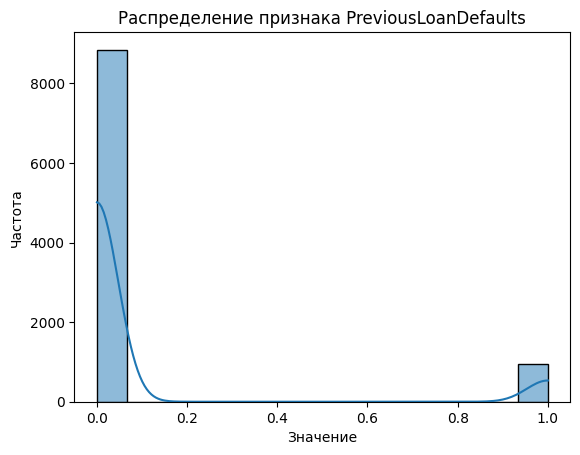

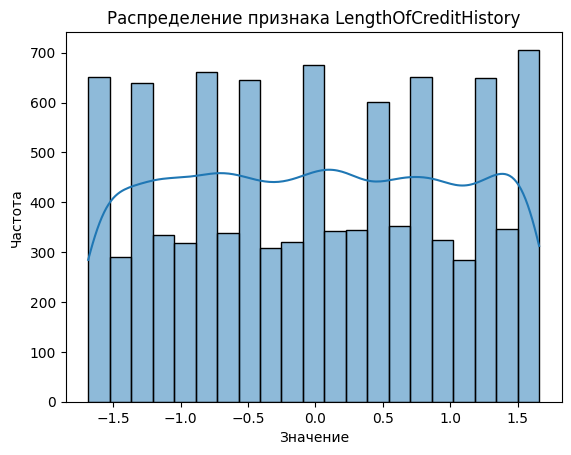

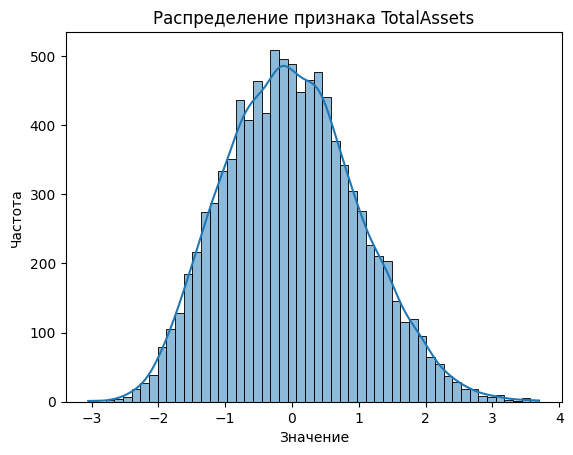

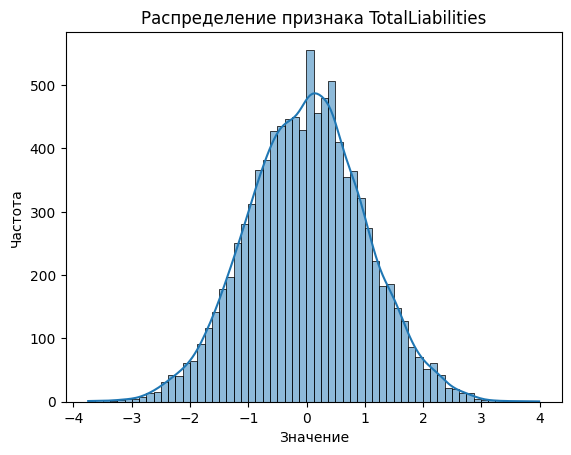

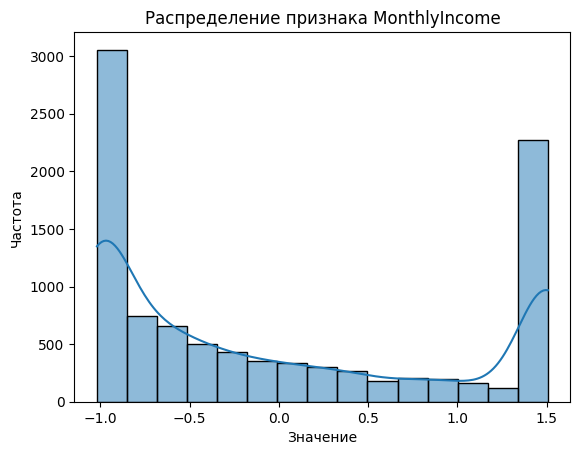

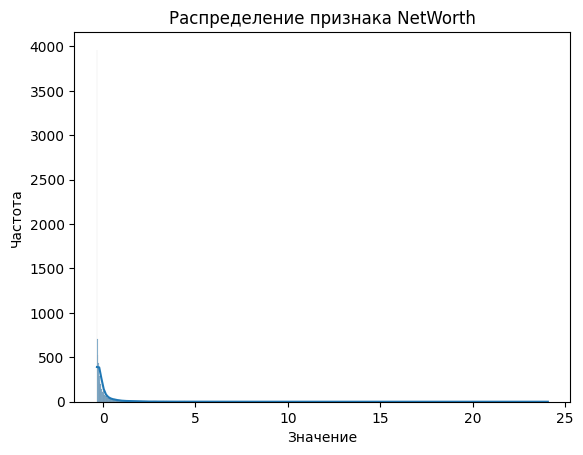

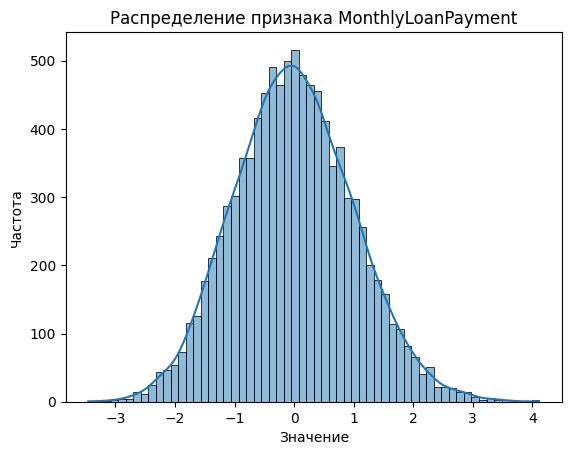

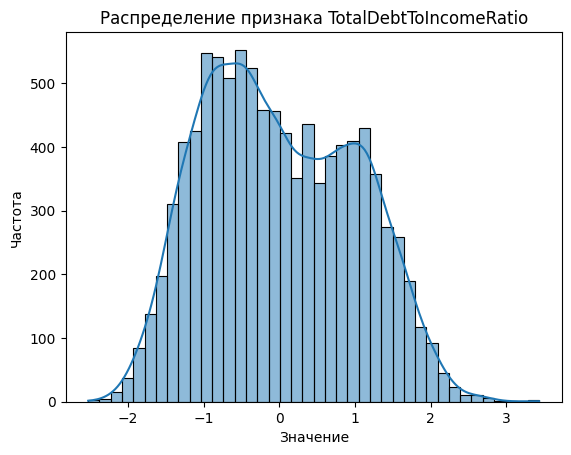

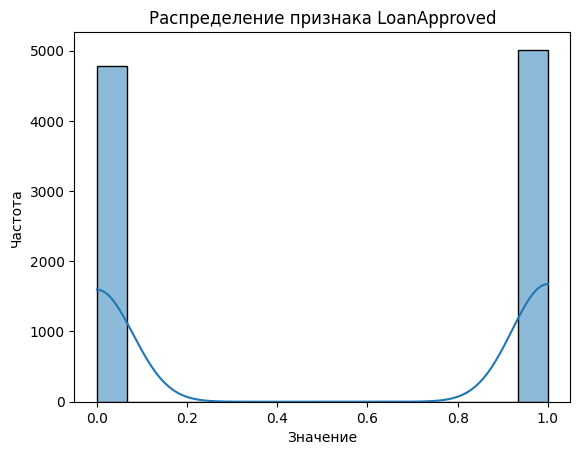

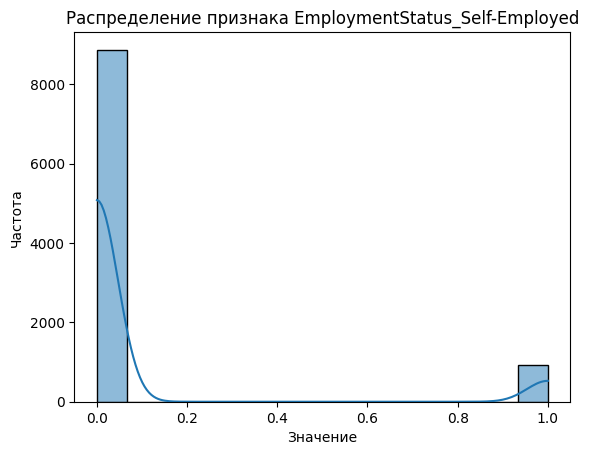

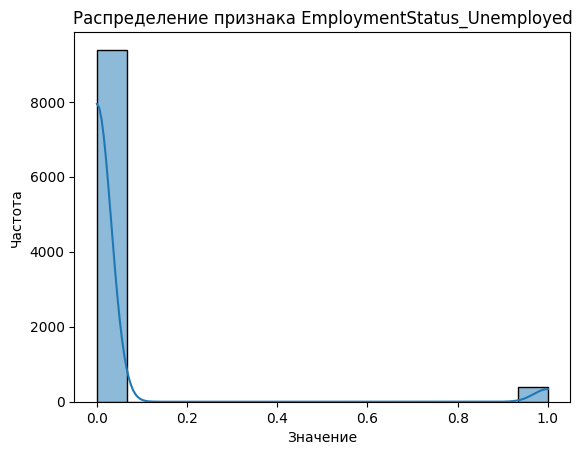

In [141]:
for feature in important_features:
    distribution_plot(df, feature)

Посмотрев на распределения, мы можем понять, что некоторые признаки можно засунуть под логарифм и получить нечто похожее на нормальное расперделение, что, вообще говоря, может быть полезно для улучшения предсказание (реализуем в следующих эпизодах...)

In [142]:
df = df[important_features]
df

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyIncome,NetWorth,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,-0.557445,-0.735103,-0.300908,1.266570,-0.612661,-0.268536,0.0,0.0,-1.223723,-0.172064,-0.255901,-0.559931,-0.256963,-0.348349,0.246009,0.0,0.0,0.0
1,0.349975,0.981315,-0.390616,-0.798365,-0.406170,-0.515243,0.0,0.0,-0.532048,0.261604,0.716018,0.373892,-0.274446,-0.336112,-1.003534,1.0,0.0,0.0
2,1.451557,0.981315,0.712910,0.393909,0.916451,-2.662755,1.0,0.0,-0.416769,1.088445,-0.305821,1.507527,0.270408,0.653897,-0.744261,1.0,0.0,0.0
3,-0.834415,0.964208,-0.168858,-1.201433,-0.306301,0.880167,0.0,0.0,0.620743,-1.131666,-1.159605,-0.844960,-0.312976,-0.371155,0.069955,1.0,0.0,0.0
4,1.451557,0.981315,0.416790,0.430128,0.223927,-1.538057,0.0,0.0,-0.762607,-0.462268,1.837896,1.507527,-0.323211,0.086017,-0.973821,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,-0.369125,-0.170567,-1.760954,-1.760062,-1.039313,0.601250,0.0,0.0,0.044347,0.578636,-0.017234,-0.366131,-0.069196,-0.372806,-0.668779,1.0,0.0,0.0
11011,1.451557,0.981315,-1.324013,-0.461607,-0.117647,-0.291182,0.0,0.0,-0.877886,0.006428,0.483067,1.507527,-0.292639,-1.716106,-1.791307,1.0,0.0,0.0
11012,1.451557,0.981315,-0.502028,0.553295,1.018853,-0.389872,0.0,0.0,-1.569560,0.693730,-2.308844,1.507527,0.030173,-0.672617,-1.173069,1.0,0.0,0.0
11013,-1.004003,-2.154997,1.080794,0.698298,0.459290,-0.212694,0.0,0.0,-1.569560,0.444161,-1.683075,-1.019483,-0.079641,1.033989,1.635036,0.0,0.0,0.0


Великая и ужасная матрица корреляций

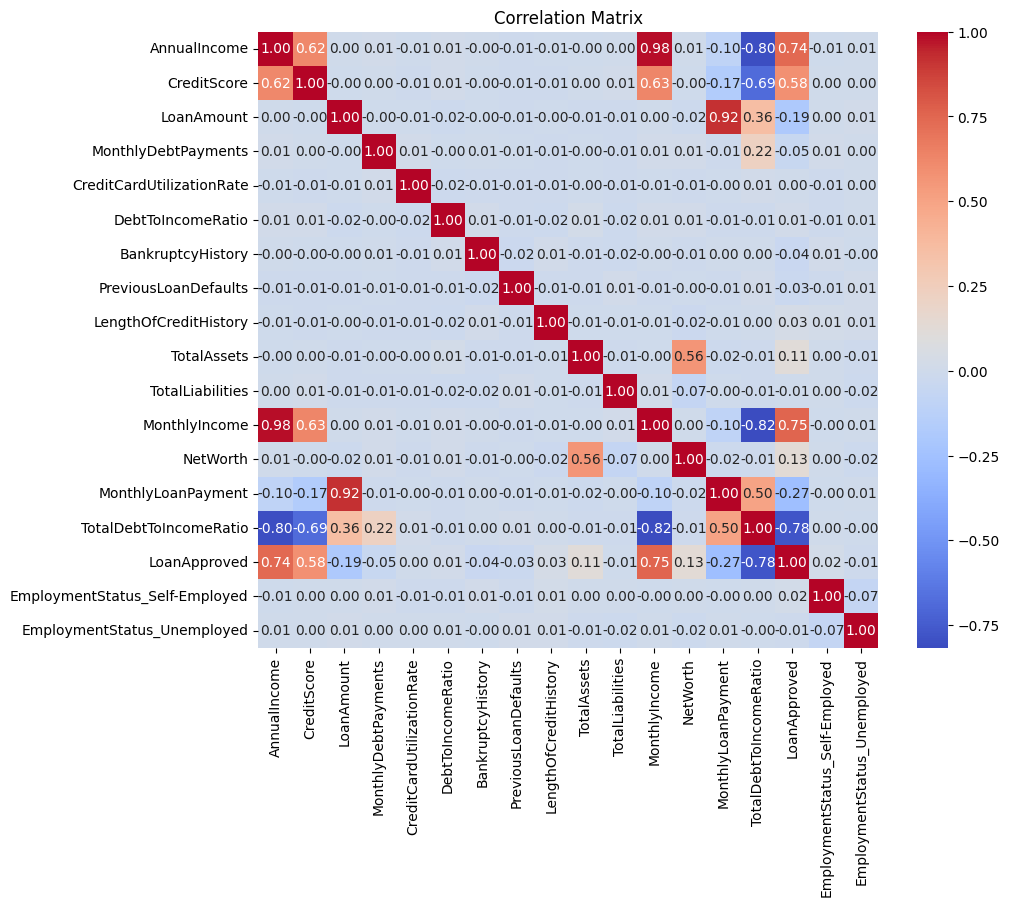

In [143]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Кто бы мог подумать, что месячный доход так сильно коррелирует с годовым доходом... Депортируем его из датасета

In [144]:
df.drop(['MonthlyIncome'], axis=1, inplace=True)
df

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,NetWorth,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,-0.557445,-0.735103,-0.300908,1.266570,-0.612661,-0.268536,0.0,0.0,-1.223723,-0.172064,-0.255901,-0.256963,-0.348349,0.246009,0.0,0.0,0.0
1,0.349975,0.981315,-0.390616,-0.798365,-0.406170,-0.515243,0.0,0.0,-0.532048,0.261604,0.716018,-0.274446,-0.336112,-1.003534,1.0,0.0,0.0
2,1.451557,0.981315,0.712910,0.393909,0.916451,-2.662755,1.0,0.0,-0.416769,1.088445,-0.305821,0.270408,0.653897,-0.744261,1.0,0.0,0.0
3,-0.834415,0.964208,-0.168858,-1.201433,-0.306301,0.880167,0.0,0.0,0.620743,-1.131666,-1.159605,-0.312976,-0.371155,0.069955,1.0,0.0,0.0
4,1.451557,0.981315,0.416790,0.430128,0.223927,-1.538057,0.0,0.0,-0.762607,-0.462268,1.837896,-0.323211,0.086017,-0.973821,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,-0.369125,-0.170567,-1.760954,-1.760062,-1.039313,0.601250,0.0,0.0,0.044347,0.578636,-0.017234,-0.069196,-0.372806,-0.668779,1.0,0.0,0.0
11011,1.451557,0.981315,-1.324013,-0.461607,-0.117647,-0.291182,0.0,0.0,-0.877886,0.006428,0.483067,-0.292639,-1.716106,-1.791307,1.0,0.0,0.0
11012,1.451557,0.981315,-0.502028,0.553295,1.018853,-0.389872,0.0,0.0,-1.569560,0.693730,-2.308844,0.030173,-0.672617,-1.173069,1.0,0.0,0.0
11013,-1.004003,-2.154997,1.080794,0.698298,0.459290,-0.212694,0.0,0.0,-1.569560,0.444161,-1.683075,-0.079641,1.033989,1.635036,0.0,0.0,0.0


In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df)

print(f"Количество признаков до полиномизации: {df.shape[1]}")
print(f"Количество признаков после полиномизации: {df_poly.shape[1]}")

Количество признаков до полиномизации: 17
Количество признаков после полиномизации: 170


Финальная (на данный момент) модель, используем RidgeCV, в который как понятно по названию, зашита кросс-валидация

In [146]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import RidgeCV
# from sklearn.metrics import mean_squared_error

# X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

# ridge_cv = RidgeCV(cv = 10,
#                    alphas=[0.1, 1, 10, 100],
#                    fit_intercept=True)

# ridge_cv.fit(X_train, y_train)

# y_pred = ridge_cv.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df_poly, Y, test_size=0.2, random_state=42)

# Определение модели Ridge
ridge = Ridge()

# Определение диапазона значений для альфа
# alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
alpha_values = {'alpha': np.logspace(-7, 3, 11)}

ridge_grid_search = GridSearchCV(estimator=ridge, 
                                 param_grid=alpha_values, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1)  # Параллельное выполнение для ускорения

# Обучение модели
ridge_grid_search.fit(X_train, y_train)

# Лучшая модель и оптимальная альфа
best_ridge_model = ridge_grid_search.best_estimator_
best_alpha = ridge_grid_search.best_params_['alpha']

print(f"Лучшее значение alpha: {best_alpha}")

# Оценка на тестовых данных
y_pred = best_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error на тестовых данных: {mse}")


Лучшее значение alpha: 10.0
Mean Squared Error на тестовых данных: 10.448812305363075


Готовим тестовые данные, чтобы модель не была в шоке, увидев столько признаков с ненормализованнымии значениями

In [147]:
from sklearn.preprocessing import StandardScaler

df_test = pd.read_csv('./test.csv')

df_test.drop('ApplicationDate', axis=1, inplace=True)

features_to_log = ['LoanAmount', 'MonthlyDebtPayments',
                   'CreditCardUtilizationRate', 'DebtToIncomeRatio', 
                   'TotalAssets','TotalLiabilities', 'MonthlyLoanPayment',
                   'TotalDebtToIncomeRatio']

for feature in features_to_log:
    df_test[feature] = np.log(df_test[feature].replace(0, 1e-9))

scaler = StandardScaler()
df_test[columns_to_normalize] = scaler.fit_transform(df_test[columns_to_normalize])

categorial = df_test.select_dtypes(include=['object']).columns.tolist()
df_test = pd.get_dummies(df_test, columns=categorial, drop_first=True)
bool_cols = df_test.select_dtypes(include=['bool']).columns.tolist()
df_test[bool_cols] = df_test[bool_cols].astype(float)

df_test = df_test[important_features]
df_test.drop(['MonthlyIncome'], axis=1, inplace=True)

df_test_poly = poly.fit_transform(df_test)

Строим предикт и сохраняем его в файлик

In [148]:
prediction = best_ridge_model.predict(df_test_poly)
df_prediction = pd.DataFrame(prediction, columns=['RiskScore'])
df_prediction = df_prediction.reset_index()
df_prediction.rename(columns={'index': 'ID'}, inplace=True)
df_prediction.to_csv('submission.csv', index=False)
df_prediction

,ID,RiskScore
0,0,30.923558
1,1,54.730657
2,2,34.008722
3,3,35.540629
4,4,32.841076
...,...,...
4995,4995,33.565427
4996,4996,60.639810
4997,4997,60.780943
4998,4998,47.715321
